In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the genomap file
genomap_file_path = 'genomaps.npy'  # Replace with the actual path
genomaps = np.load(genomap_file_path)


In [3]:
# Dummy classification function (replace with actual model)
def classify_genomap(genomap):
    cell_types = [
        'Keratinocyte', 'Basal cell of epidermis', 'Bladder urothelial cell',
        'Hepatocyte', 'Duct epithelial cell', 'Promonocyte',
        'Granulocytopoietic cell', 'Pre-pro B cell', 'Late-pro B cell', 'Immature B cell'
    ]
    return np.random.choice(cell_types)

# Classify each genomap
classified_labels = [classify_genomap(genomap) for genomap in genomaps]


In [3]:
# Output folder
output_folder = 'save_annotated_genomaps/'  # Replace with your desired path
os.makedirs(output_folder, exist_ok=True)

# Annotate and save each genomap
for idx, (genomap, label) in enumerate(zip(genomaps, classified_labels)):
    plt.figure(figsize=(6, 6))
    plt.imshow(genomap, cmap='viridis')
    plt.title(label)
    plt.colorbar()
    plt.savefig(os.path.join(output_folder, f'genomap_{idx + 1}_{label}.png'))
    plt.close()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\Fall 2024\manaswini capstone\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Fall 2024\manaswini capstone\myenv\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Fall 2024\manaswini capstone\myenv\Lib\site-packages\IPython\core\ultratb.py", line 1348, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Fall 2024\manaswini capstone\myenv\Lib\site-packages\IPython\core\ultratb.py", line 1195, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

MemoryError: Unable to allocate 1.06 MiB for an array with shape (373, 373) and data type float64

<Figure size 600x600 with 2 Axes>

In [4]:
from collections import Counter

# Count the occurrences of each cell type
label_counts = Counter(classified_labels)

# Print summary
print("Classified Cell Types Summary:")
for cell_type, count in label_counts.items():
    print(f"{cell_type}: {count}")


Classified Cell Types Summary:
Immature B cell: 5533
Pre-pro B cell: 5442
Granulocytopoietic cell: 5458
Keratinocyte: 5528
Bladder urothelial cell: 5581
Late-pro B cell: 5445
Basal cell of epidermis: 5349
Promonocyte: 5615
Hepatocyte: 5467
Duct epithelial cell: 5446


KeyboardInterrupt: 

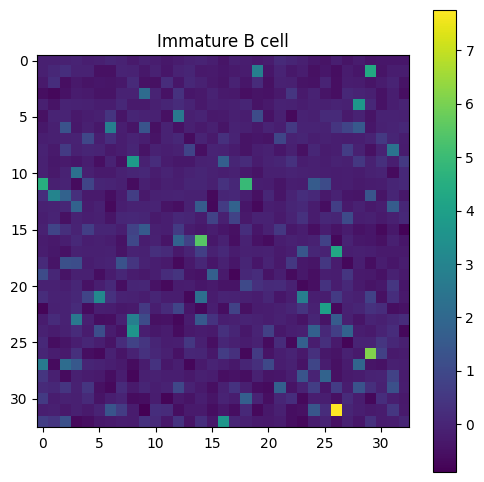

In [5]:
import os

# Output folder for all categories
main_output_folder = 'organized_genomaps/'  # Replace with your desired path
os.makedirs(main_output_folder, exist_ok=True)

# Annotate and save each genomap in its respective category folder
for idx, (genomap, label) in enumerate(zip(genomaps, classified_labels)):
    # Create subfolder for the category if it doesn't exist
    category_folder = os.path.join(main_output_folder, label)
    os.makedirs(category_folder, exist_ok=True)
    
    # Save the genomap in the respective subfolder
    plt.figure(figsize=(6, 6))
    plt.imshow(genomap, cmap='viridis')
    plt.title(label)
    plt.colorbar()
    plt.savefig(os.path.join(category_folder, f'genomap_{idx + 1}.png'))
    plt.close()


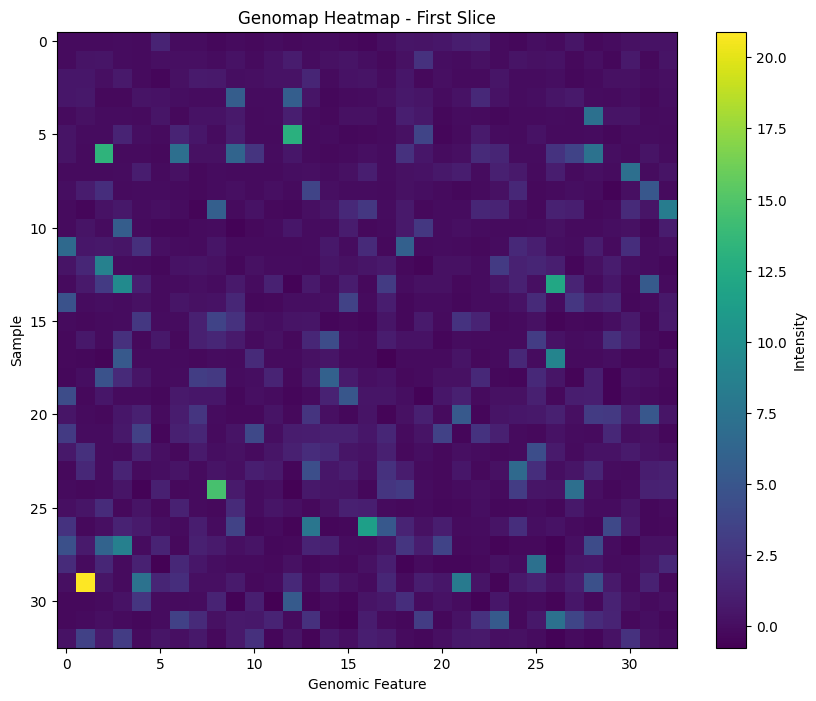

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the genomap data (replace with the actual file path)
genomap_file_path = 'genomaps.npy'  # Update this path as necessary
genomaps = np.load(genomap_file_path)

# Visualize the first slice (index 0)
plt.figure(figsize=(10, 8))
plt.imshow(genomaps[0], aspect='auto', cmap='viridis')
plt.colorbar(label='Intensity')
plt.title('Genomap Heatmap - First Slice')
plt.xlabel('Genomic Feature')
plt.ylabel('Sample')
plt.show()



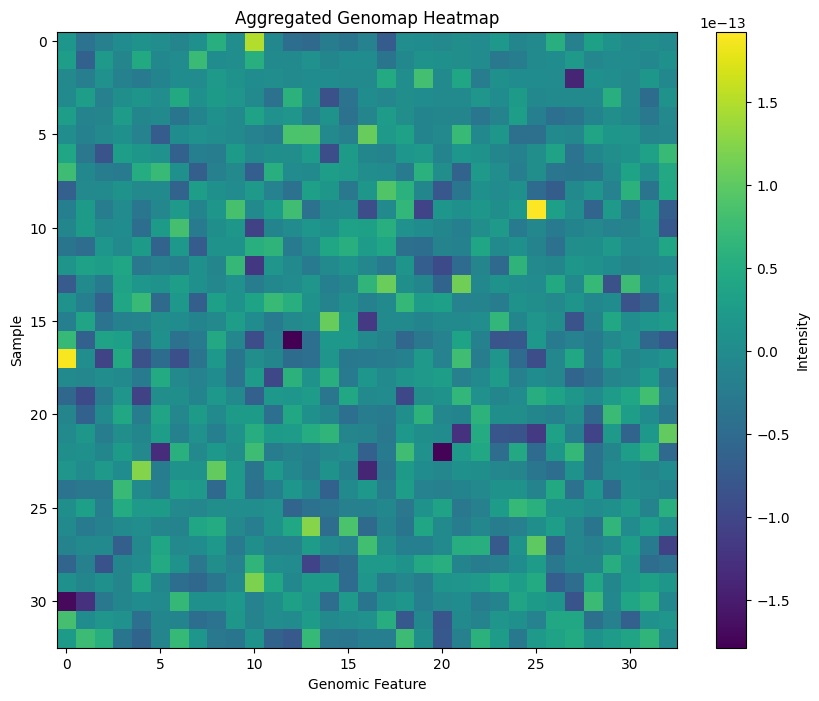

In [6]:
# Aggregate by mean
aggregated_genomap = np.mean(genomaps, axis=0)

plt.figure(figsize=(10, 8))
plt.imshow(aggregated_genomap, aspect='auto', cmap='viridis')
plt.colorbar(label='Intensity')
plt.title('Aggregated Genomap Heatmap')
plt.xlabel('Genomic Feature')
plt.ylabel('Sample')
plt.show()


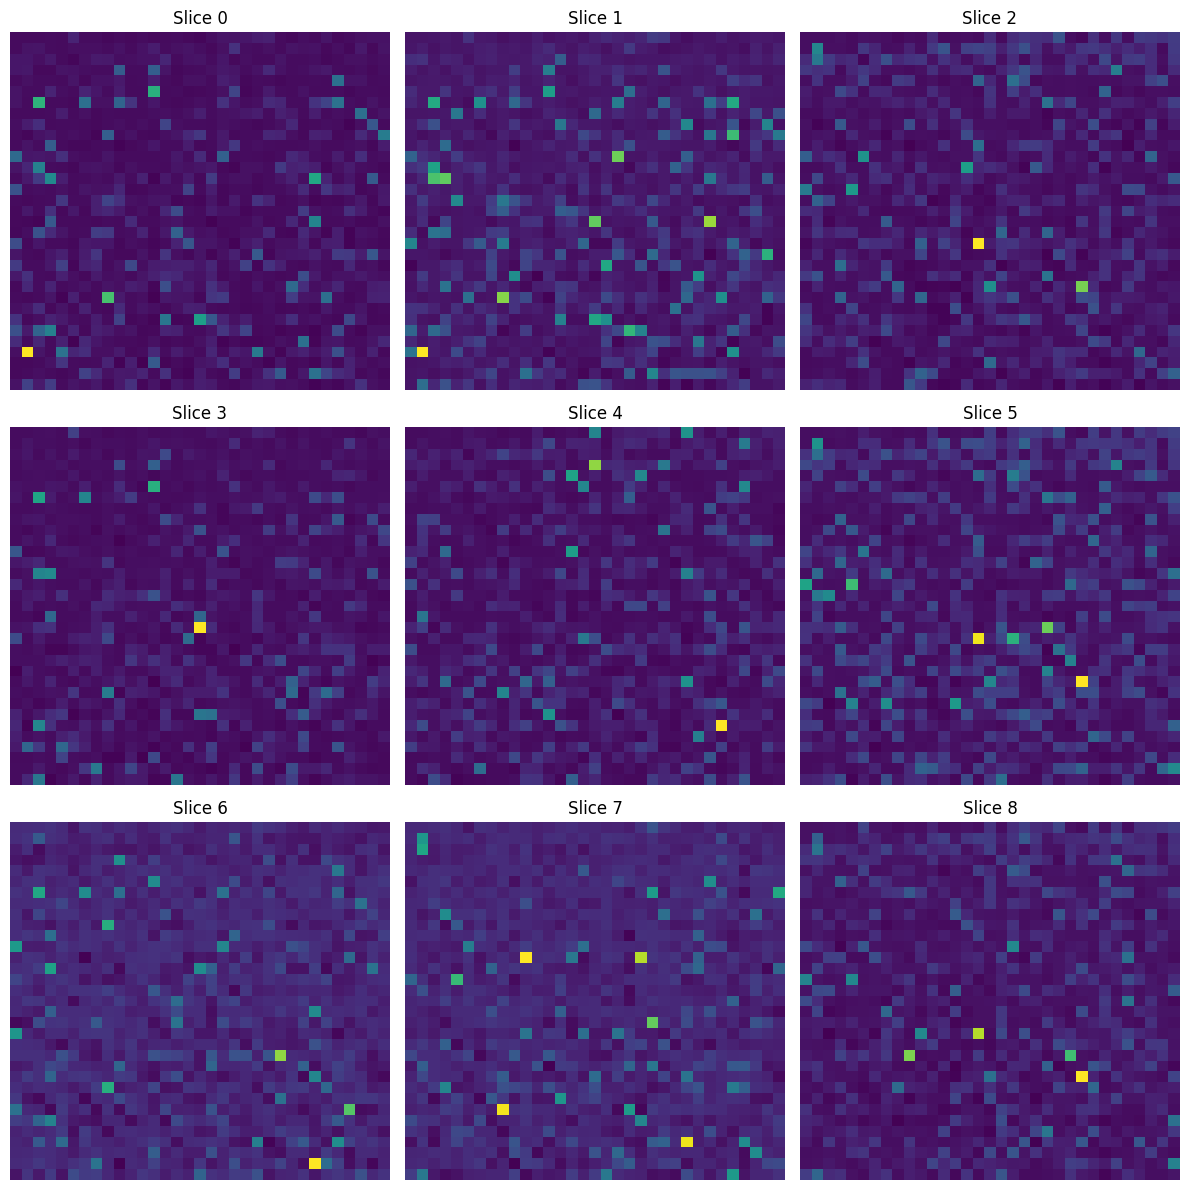

In [7]:
num_slices_to_display = 9  # Adjust as needed
slices = genomaps[:num_slices_to_display]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid
for i, ax in enumerate(axes.flat):
    ax.imshow(slices[i], cmap='viridis', aspect='auto')
    ax.set_title(f'Slice {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()


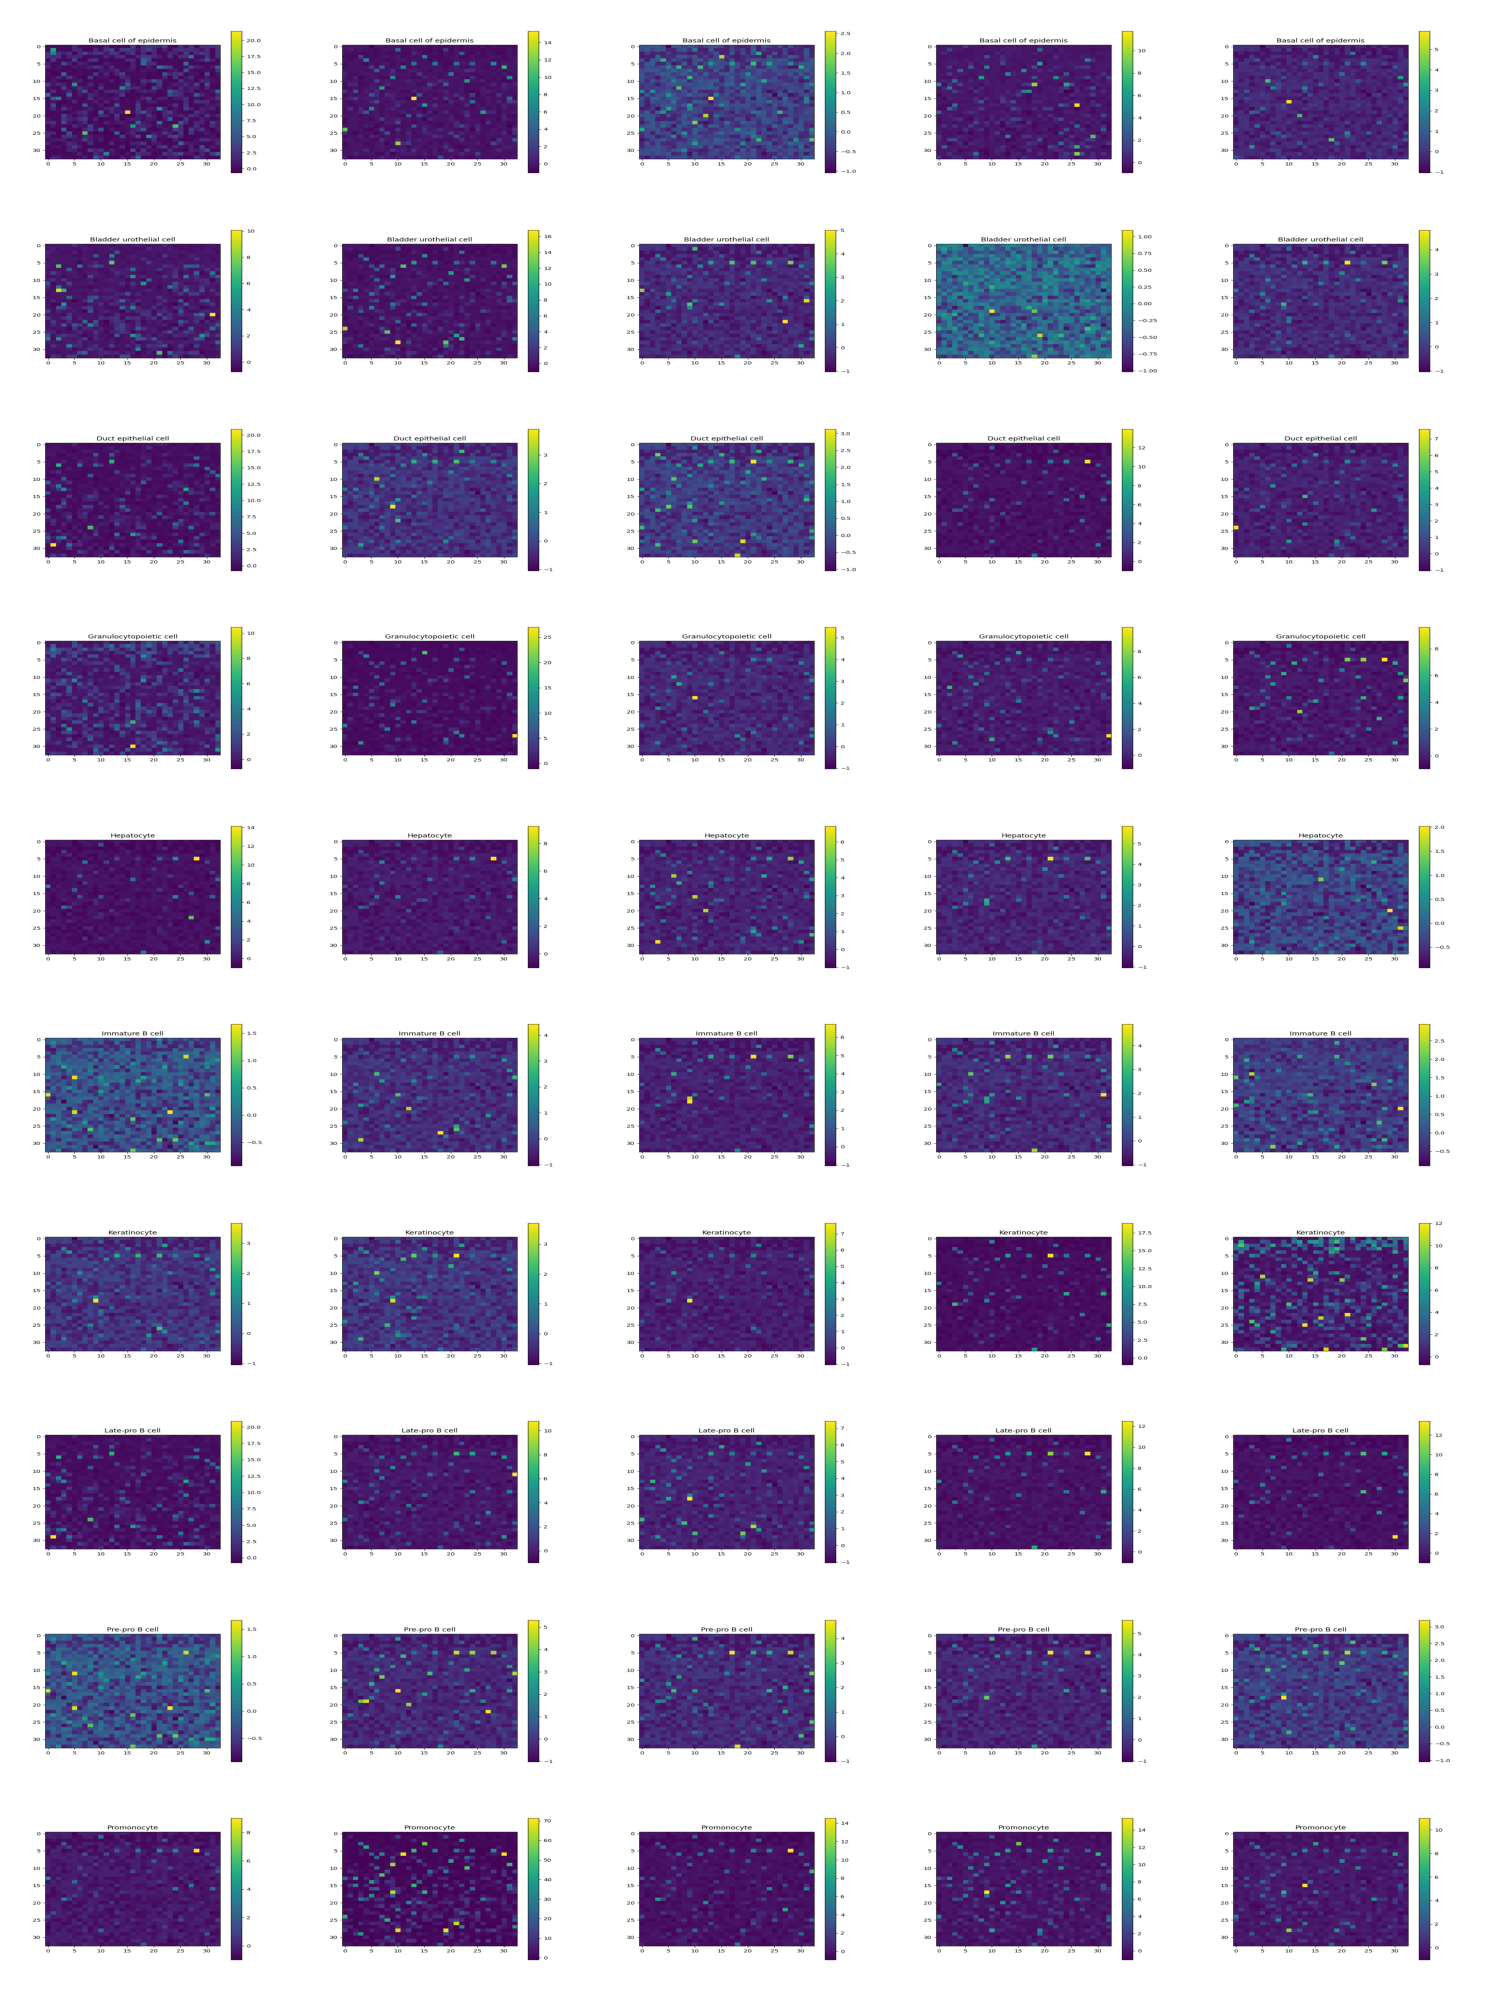

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # For reading image files


# Path to the main directory containing cell type folders
main_directory = 'organized_genomaps'

# List of cell type directories
cell_types = sorted(os.listdir(main_directory))

# Number of genomaps to display per cell type
num_genomaps_per_type = 5

# Prepare to store genomap data and labels
genomaps_list = []
cell_type_labels = []

for cell_type in cell_types:
    cell_type_path = os.path.join(main_directory, cell_type)
    if os.path.isdir(cell_type_path):
        # List all image files in the cell type directory
        image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
        genomap_files = [f for f in os.listdir(cell_type_path) if f.endswith(image_extensions)]
        
        # ... [Rest of the code remains the same]
        
        # Limit to the specified number of genomaps
        selected_files = genomap_files[:num_genomaps_per_type]
        
        # Load genomaps and store them
        cell_genomaps = []
        for file_name in selected_files:
            file_path = os.path.join(cell_type_path, file_name)
            genomap = mpimg.imread(file_path)  # Use mpimg.imread instead of np.load
            cell_genomaps.append(genomap)
        
        # Append to the main list
        genomaps_list.append(cell_genomaps)
        cell_type_labels.append(cell_type)
    else:
        print(f"Skipping {cell_type_path}, since it's not a directory.")

# Determine the number of cell types and genomaps per type
num_cell_types = len(genomaps_list)
genomaps_per_type = num_genomaps_per_type

# Create the grid for visualization
fig, axes = plt.subplots(num_cell_types, genomaps_per_type, figsize=(15, num_cell_types * 2))

# If only one genomap per type, axes may not be a 2D array
if num_cell_types == 1:
    axes = [axes]

for i, (cell_genomaps, cell_type) in enumerate(zip(genomaps_list, cell_type_labels)):
    for j in range(genomaps_per_type):
        ax = axes[i][j] if num_cell_types > 1 else axes[j]
        if j < len(cell_genomaps):
            ax.imshow(cell_genomaps[j], cmap='viridis', aspect='auto')
        else:
            # Hide axes with no data
            ax.axis('off')
            continue
        ax.axis('off')
        if j == 0:
            # Add cell type labels to the first column
            ax.set_ylabel(cell_type, fontsize=10, rotation=0, labelpad=70, va='center')

plt.tight_layout()
plt.show()


d:\Fall 2024\manaswini capstone\myenv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



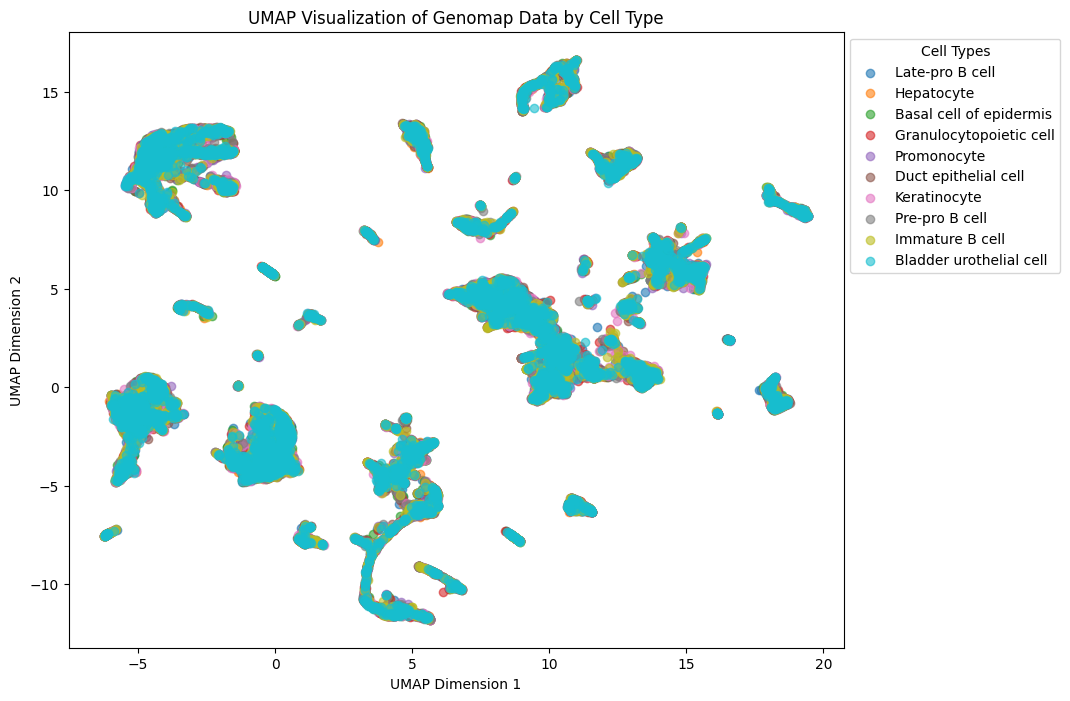

In [12]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Flatten each genomap into a 1D array
genomaps_flattened = genomaps.reshape(genomaps.shape[0], -1)  # Flatten 33x33 to a single dimension

# Assuming `classifications` contains annotated cell types; generate dummy ones if missing
if 'classifications' not in locals():
    classifications = [classify_genomap(gm) for gm in genomaps]

# Create a DataFrame with flattened genomaps
genomap_df = pd.DataFrame(genomaps_flattened)
genomap_df['Cell Type'] = classifications  # Adding annotations

# Apply UMAP dimensionality reduction
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(genomap_df.iloc[:, :-1])  # Exclude 'Cell Type'

# Create a visualization
plt.figure(figsize=(10, 8))
for cell_type in set(classifications):
    indices = [i for i, c in enumerate(classifications) if c == cell_type]
    plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1], label=cell_type, alpha=0.6)

plt.title("UMAP Visualization of Genomap Data by Cell Type")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(loc='best', bbox_to_anchor=(1, 1), title="Cell Types")
plt.show()
